# Clustering

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.api as sm
import pylab as py

In [318]:
FPKM = pd.read_csv("all_annotated.csv")
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [319]:
FPKM["median"] = FPKM.iloc[:, 3: ].median(axis = 1)
FPKM

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591,2.06420
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


In [320]:
FPKM_filter = FPKM[FPKM["median"]>0]
FPKM_filter.columns

Index(['t_name', 'gene_name', 'male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D', 'median'],
      dtype='object')

In [321]:
for i in ['male_10', 'male_11', 'male_12', 'male_13',
       'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
       'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
       'female_14C', 'female_14D'] :
    FPKM_filter[i] = np.log2(FPKM_filter[i] + 1)

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [322]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141


In [150]:
# for i in ['male_10', 'male_11', 'male_12', 'male_13',
#        'male_14A', 'male_14B', 'male_14C', 'male_14D', 'female_10',
#        'female_11', 'female_12', 'female_13', 'female_14A', 'female_14B',
#        'female_14C', 'female_14D']:
#     FPKM_filter.loc[:, i] = np.log2(FPKM_filter.loc[:, i] + 1)

In [90]:
FPKM_filter.columns[2:-1]

Index(['male_10', 'male_11', 'male_12', 'male_13', 'male_14A', 'male_14B',
       'male_14C', 'male_14D', 'female_10', 'female_11', 'female_12',
       'female_13', 'female_14A', 'female_14B', 'female_14C', 'female_14D'],
      dtype='object')

In [293]:
FPKM_filter_array = FPKM_filter.iloc[:, 2:-1].to_numpy().T
FPKM_filter_array

array([[ 4.6271728 ,  3.58462259,  4.32681947, ...,  4.71201055,
        11.19248592,  1.59033805],
       [ 3.69686418,  0.        ,  0.        , ...,  0.71231404,
         5.13258445,  0.        ],
       [ 4.44410369,  0.        ,  3.98480533, ...,  4.47775755,
         9.85890082,  3.16898486],
       ...,
       [ 4.5779234 ,  2.34692428,  3.07600746, ...,  4.4996401 ,
         8.82106733,  0.8764529 ],
       [ 3.93830612,  0.        ,  3.0616314 , ...,  6.53763954,
         9.43715137,  1.10550846],
       [ 4.18607025,  4.71614708,  4.57243412, ...,  9.41463427,
        12.15407192,  1.57817068]])

In [294]:
Z = linkage(FPKM_filter_array)
Z.shape

(15, 4)

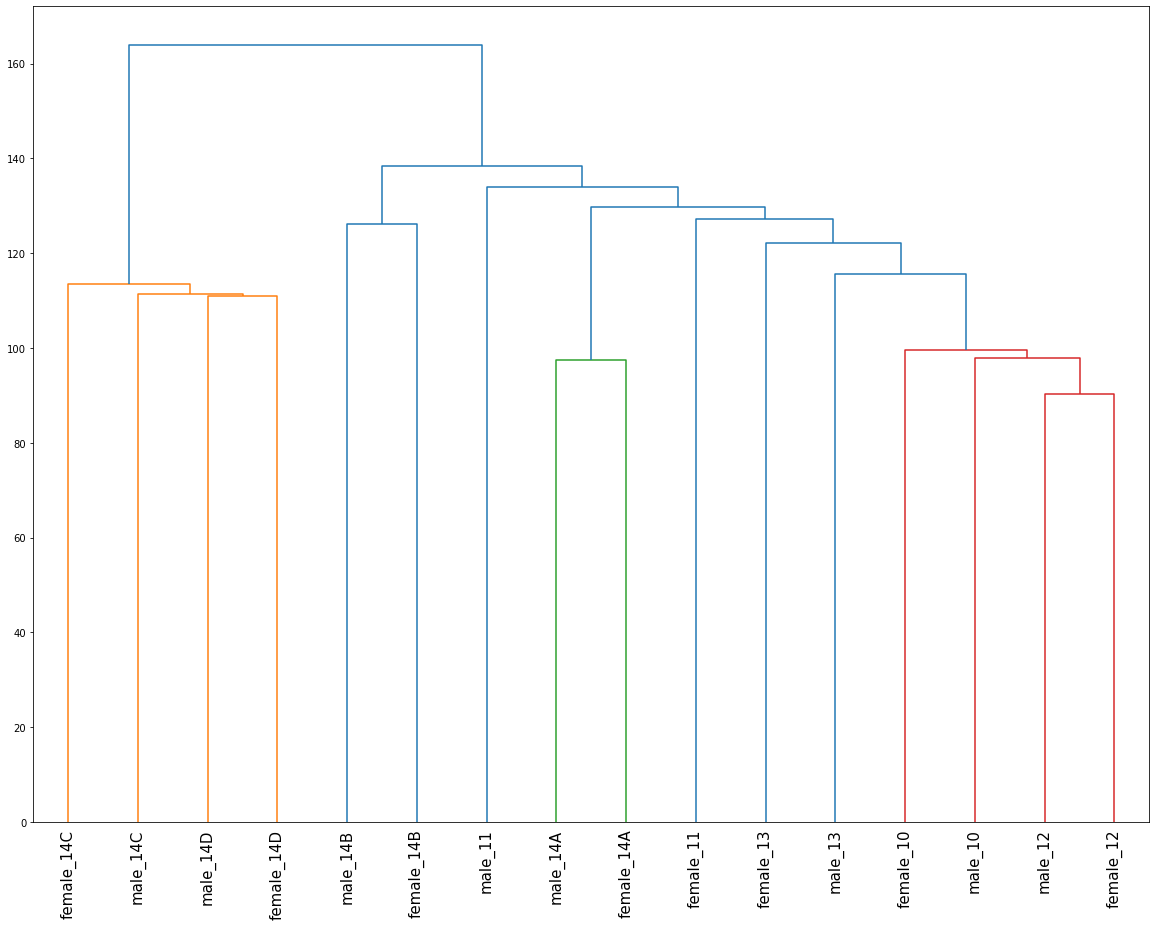

In [295]:
plt.figure(figsize=(20, 15))
dn = dendrogram(Z, 
                labels = FPKM_filter.columns[2:-1],
                leaf_rotation=90,
                leaf_font_size=15,
                )
plt.show()

# Differential expression

## Use ordinary least squares regression to test for genes that are differentially expressed across stages. Use the stage number as a numeric independent variable (10, 11, 12, 13, 14), and ignore the letter suffixes on day 14 (i.e., treat 14A, 14B, 14C, and 14D as equivalent).

In [305]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,Corrected_P
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570,0.074778
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385,0.867502
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370,0.945649
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318,0.310767
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582,0.386904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439,0.221850
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695,0.564928
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244,0.245443
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141,0.703389


In [297]:
FPKM_filter_stage = FPKM_filter.iloc[:, 2:-1]
FPKM_filter_stage.rename(columns = {"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14, "female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
                            "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace = True )
FPKM_filter_stage

,10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14
3,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070
8,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147
9,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434
10,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614
11,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656
34663,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412
34665,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634
34667,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072


In [298]:
pvalues_all = []
X = np.array(FPKM_filter_stage.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(FPKM_filter_stage.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_all.append(model.pvalues)

In [299]:
pvalues = []
for i in range(0, len(pvalues_male)):
    pvalues.append(pvalues_male[i][0])

## Generate a QQ plot from the p-values.

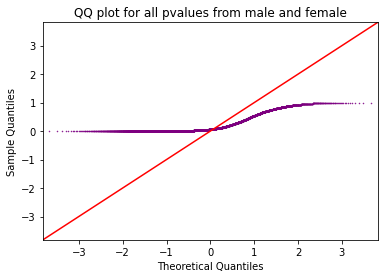

In [300]:
fig = sm.qqplot(np.array(pvalues), line='45', markersize = 0.5, color = "purple")
plt.title("QQ plot for all pvalues from male and female")
py.show()

## Report the list of genes that exhibit differential expression by stage at a 10% false discovery rate.



In [301]:
import statsmodels.stats as ss
corrected_all = list(ss.multitest.fdrcorrection(np.array(pvalues))[1])

In [303]:
FPKM_filter

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,Corrected_P
3,FBtr0302347,CR40182,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306,4.186070,17.202570,0.074778
8,FBtr0113885,Parp,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000,4.716147,4.087385,0.867502
9,FBtr0301810,Alg-2,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631,4.572434,14.832370,0.945649
10,FBtr0113895,Tim17b,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353,6.296614,52.928318,0.310767
11,FBtr0345179,Tim17b,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737,6.425201,72.815582,0.386904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34658,FBtr0100879,mt:ND4,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813,7.775656,41.339439,0.221850
34663,FBtr0100884,mt:Cyt-b,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355,7.394412,71.916695,0.564928
34665,FBtr0100886,mt:ND1,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640,9.414634,222.375244,0.245443
34667,FBtr0100888,mt:lrRNA,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151,12.154072,1651.994141,0.703389


In [304]:
FPKM_filter["Corrected_P"] = corrected_all
FPKM_filter
gene_list_all = FPKM_filter[FPKM_filter["Corrected_P"] < 0.05][["gene_name", "Corrected_P"]]
gene_list_all["P_logTrans"] = -np.log10(gene_list_all["Corrected_P"])
gene_list_all

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,gene_name,Corrected_P,P_logTrans
46,aux,0.040084,1.397032
50,CG14641,0.032457,1.488693
51,abs,0.010809,1.966218
102,Vps24,0.006209,2.206962
111,CG9776,0.026232,1.581163
...,...,...,...
34472,CG11360,0.022753,1.642969
34488,CG11231,0.008709,2.060051
34543,CG11076,0.021761,1.662317
34547,ATPsyn-beta,0.006466,2.189336


## Repeat the analysis while controlling for sex.

## Male

In [333]:
male_FPKM = FPKM_filter.iloc[:, 2:10]
female_FPKM = FPKM_filter.iloc[:, 10:-2]

In [334]:
female_FPKM.rename(columns={"female_10": 10, "female_11": 11, "female_12": 12, "female_13": 13, 
                            "female_14A": 14, "female_14B": 14, "female_14C": 14, "female_14D": 14}, inplace=True)

In [308]:
male_FPKM.rename(columns={"male_10": 10, "male_11": 11, "male_12": 12, "male_13": 13, 
                            "male_14A": 14, "male_14B": 14, "male_14C": 14, "male_14D": 14}, inplace=True)

In [310]:
pvalues_male = []
X = np.array(male_FPKM.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(male_FPKM.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_male.append(model.pvalues)

In [311]:
pvalues_M = []
for i in range(0, len(pvalues_male)):
    pvalues_M.append(pvalues_male[i][0])
corrected_M = list(ss.multitest.fdrcorrection(np.array(pvalues_M))[1])

In [312]:
male_FPKM["corrected P"] = corrected_M
male_FPKM

,10,11,12,13,14,14,14,14,corrected P
3,4.627173,3.696864,4.444104,3.864614,4.307583,4.797153,4.574095,3.664793,0.074778
8,3.584623,0.000000,0.000000,0.000000,3.982340,0.000000,4.217360,3.552051,0.867502
9,4.326819,0.000000,3.984805,4.847692,4.541653,3.145090,3.891336,3.797596,0.945649
10,2.870999,2.303164,2.856853,6.148587,6.091881,3.105338,6.247530,5.774532,0.310767
11,6.910803,3.658901,6.920499,6.262622,6.205853,6.964043,6.361669,5.922625,0.386904
...,...,...,...,...,...,...,...,...,...
34658,3.603093,0.476897,2.389701,6.563374,6.463432,4.557624,6.211401,5.846431,0.221850
34663,5.101875,1.039946,3.437342,8.699998,6.693892,4.725128,6.184881,6.956232,0.564928
34665,4.712011,0.712314,4.477758,9.017023,8.354531,5.801778,8.496917,7.803325,0.245443
34667,11.192486,5.132584,9.858901,12.271964,11.137065,9.216125,11.284297,10.690866,0.703389


In [314]:
gene_M = FPKM_filter[male_FPKM["corrected P"] < 0.05][["gene_name"]]
gene_M["P_logTrans"] = -np.log10(male_FPKM[male_FPKM["corrected P"] < 0.05]["corrected P"])
gene_M

,gene_name,P_logTrans
46,aux,1.397032
50,CG14641,1.488693
51,abs,1.966218
102,Vps24,2.206962
111,CG9776,1.581163
...,...,...
34472,CG11360,1.642969
34488,CG11231,2.060051
34543,CG11076,1.662317
34547,ATPsyn-beta,2.189336


## Female

In [335]:
female_FPKM

,10,11,12,13,14,14,14
3,4.516913,3.899375,4.127810,3.767939,5.035625,4.577923,3.938306
8,0.000000,0.000000,3.989925,3.955963,4.415736,2.346924,0.000000
9,4.290624,1.970553,4.278193,4.777780,4.831106,3.076007,3.061631
10,5.515626,4.156566,5.752971,6.302870,6.354127,5.038433,5.647353
11,5.628798,4.265925,5.866512,6.454280,6.468371,5.150651,5.760737
...,...,...,...,...,...,...,...
34658,5.403930,0.362582,4.546982,6.569252,8.077814,4.583534,5.068813
34663,6.916130,0.742416,5.623797,6.188177,7.897266,5.482234,6.256355
34665,8.264024,1.657007,7.656200,8.618918,8.763733,4.499640,6.537640
34667,11.333058,6.277157,11.087730,11.867924,6.953149,8.821067,9.437151


In [336]:
pvalues_female = []
X = np.array(female_FPKM.columns, int).reshape(-1,1)
X = sm.add_constant(X)
for i in range(0, 8289):
    Y = np.array(female_FPKM.iloc[i])
    model = sm.OLS(Y, X).fit()
    pvalues_female.append(model.pvalues)
pvalues_F = []
for i in range(0, len(pvalues_female)):
    pvalues_F.append(pvalues_female[i][0])
corrected_F = list(ss.multitest.fdrcorrection(np.array(pvalues_F))[1])
female_FPKM["corrected P"] = corrected_F
female_FPKM
gene_F = FPKM_filter[female_FPKM["corrected P"] < 0.05][["gene_name"]]
gene_F["P_logTrans"] = -np.log10(female_FPKM[female_FPKM["corrected P"] < 0.05]["corrected P"])
gene_F

,gene_name,P_logTrans
46,aux,2.218633
50,CG14641,1.559109
102,Vps24,1.699998
115,Skp2,1.437522
116,CG1103,1.576061
...,...,...
34472,CG11360,1.622462
34542,CG11077,2.196821
34543,CG11076,2.218633
34547,ATPsyn-beta,2.246590


In [ ]:
gene_list_all
gene_M
gene_F